In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from numpy import random

In [2]:
color_codes = [0,1,2,3,4,5,6,7]
random.shuffle(color_codes)
database = {}
for i in range(8):
    database[i] = color_codes[i]
    desired_color_code = 2
    DB = QuantumCircuit(7)

In [3]:
def DB_function(QC, color_code):
    if color_code == 7: 
        QC.mcx([0,1,2],3) 
        QC.mcx([0,1,2],4)
        QC.mcx([0,1,2],5)
    elif color_code == 6: 
        QC.mcx([0,1,2],3)
        QC.mcx([0,1,2],4)
    elif color_code == 5: 
        QC.mcx([0,1,2],3)
        QC.mcx([0,1,2],5)
    elif color_code == 4:
        QC.mcx([0,1,2],3)
    elif color_code == 3:
        QC.mcx([0,1,2],4)
        QC.mcx([0,1,2],5)
    elif color_code == 2:
        QC.mcx([0,1,2],4)
    elif color_code == 1:
        QC.mcx([0,1,2],5)
        

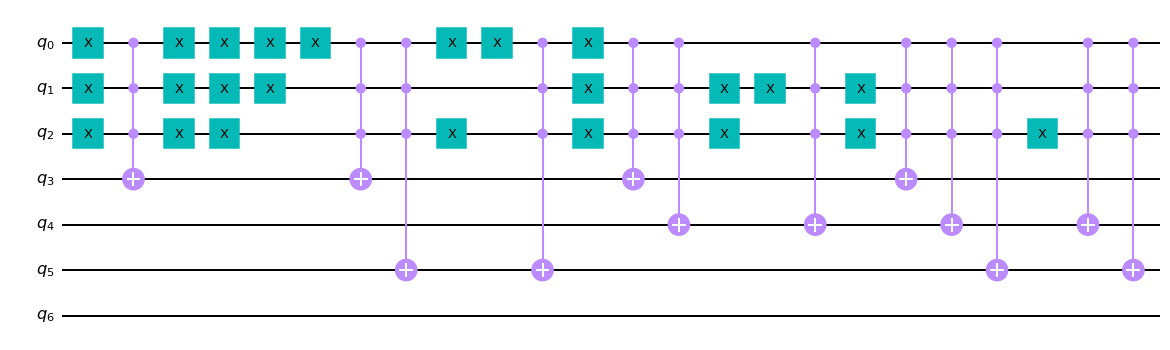

In [4]:
#for when index = 0 = 000
DB.x(0)
DB.x(1)
DB.x(2)
DB_function(DB, database[0])
DB.x(0)
DB.x(1)
DB.x(2)
#for when index = 1 = 001
DB.x(0)
DB.x(1)
DB_function(DB, database[1])
DB.x(0)
DB.x(1)
#for when index = 2 = 010
DB.x(0)
DB.x(2)
DB_function(DB, database[2])
DB.x(0)
DB.x(2)
#for when index = 3 = 011
DB.x(0)
DB_function(DB, database[3])
DB.x(0)
#for when index = 4 = 100
DB.x(1)
DB.x(2)
DB_function(DB, database[4])
DB.x(1)
DB.x(2)
#for when index = 5 = 101
DB.x(1)
DB_function(DB, database[5])
DB.x(1)
#for when index = 6 = 110
DB.x(2)
DB_function(DB, database[6])
DB.x(2)
#for when index = 7 = 111
DB_function(DB, database[7])
DB.draw()

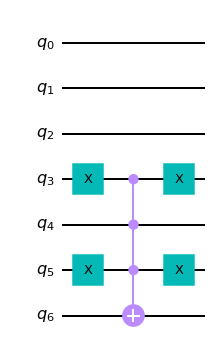

In [5]:
MG = QuantumCircuit(7)
if desired_color_code == 0:
    MG.x(3)
    MG.x(4)
    MG.x(5)
    MG.mcx([3,4,5],6)
    MG.x(3)
    MG.x(4)
    MG.x(5)
elif desired_color_code == 1:
    MG.x(3)
    MG.x(4)
    MG.mcx([3,4,5],6)
    MG.x(3)
    MG.x(4)
elif desired_color_code == 2:
    MG.x(3)
    MG.x(5)
    MG.mcx([3,4,5],6)
    MG.x(3)
    MG.x(5)
elif desired_color_code == 3:
    MG.x(3)
    MG.mcx([3,4,5],6)
    MG.x(3)
elif desired_color_code == 4:
    MG.x(4)
    MG.x(5)
    MG.mcx([3,4,5],6)
    MG.x(4)
    MG.x(5)
elif desired_color_code == 5:
    MG.x(4)
    MG.mcx([3,4,5],6)
    MG.x(4)
elif desired_color_code == 6:
    MG.x(4)
    MG.mcx([3,4,5],6)
    MG.x(4)
elif desired_color_code == 7:
    MG.mcx([3,4,5],6) 
MG.draw()

/tmp/ipykernel_77/1777145113.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  oracle = oracle + DB + MG + DB


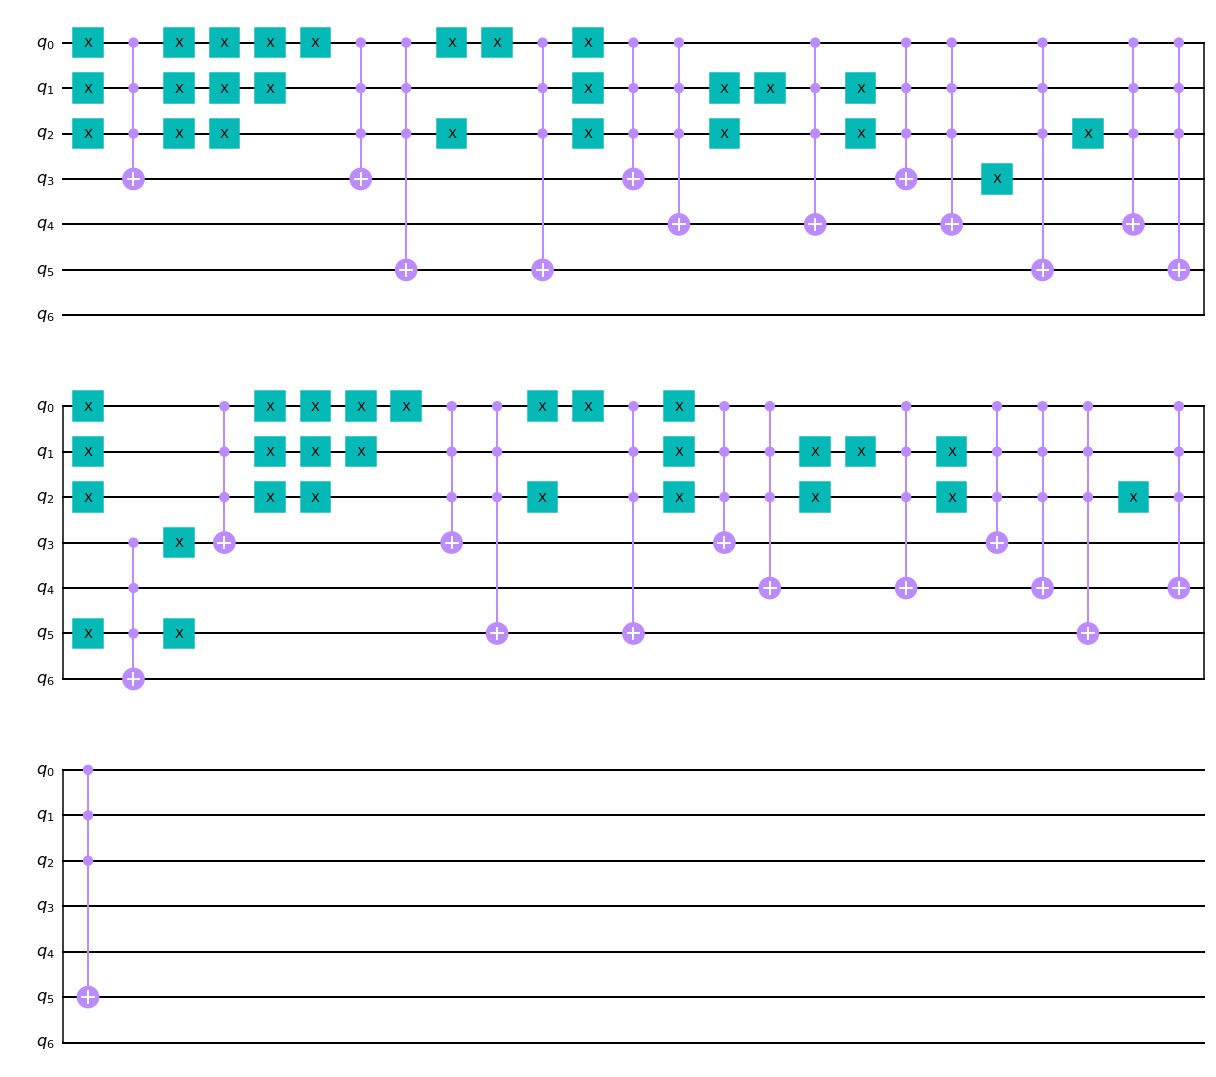

In [6]:
oracle = QuantumCircuit(7)
oracle = oracle + DB + MG + DB
oracle.draw()

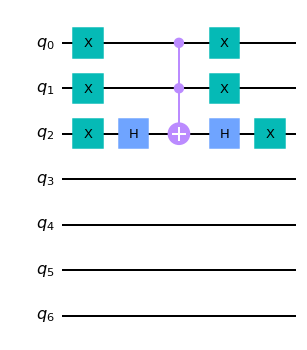

In [7]:
phase = QuantumCircuit(7)
phase.x(0)
phase.x(1)
phase.x(2)
phase.h(2)
phase.ccx(0,1,2)
phase.h(2)
phase.x(0)
phase.x(1)
phase.x(2)
phase.draw()

/tmp/ipykernel_77/3656402315.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  Grover = Grover + oracle
/tmp/ipykernel_77/3656402315.py:6: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  Grover = Grover + phase
/tmp/ipykernel_77/3656402315.py:10: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  Grover = Grover + Grover


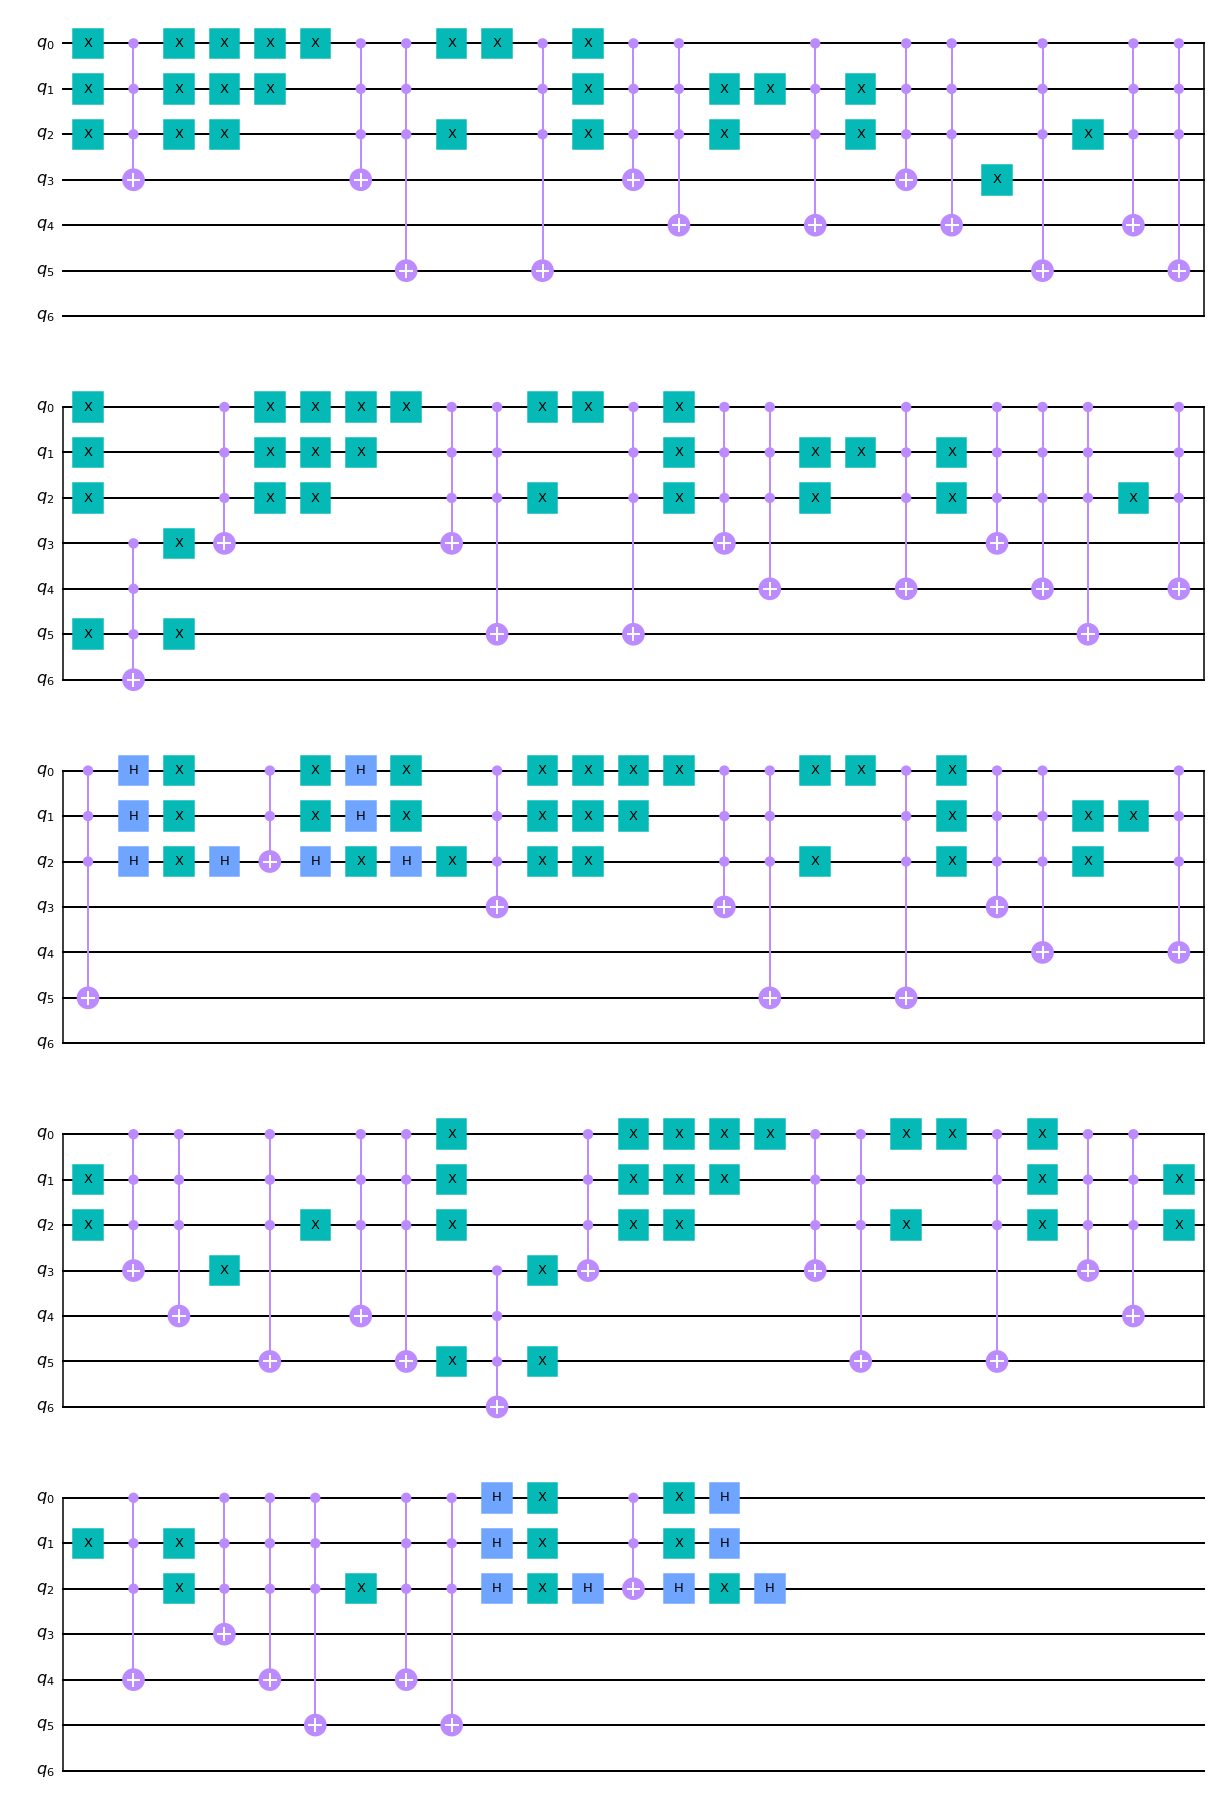

In [8]:
Grover = QuantumCircuit(7)
Grover = Grover + oracle
Grover.h(0)
Grover.h(1)
Grover.h(2)
Grover = Grover + phase
Grover.h(0)
Grover.h(1)
Grover.h(2)
Grover = Grover + Grover
Grover.draw()

In [9]:
circuit = QuantumCircuit(7,3)
circuit.x(6)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(6)
circuit = circuit + Grover
circuit.measure(0,2)
circuit.measure(1,1)
circuit.measure(2,0)


/tmp/ipykernel_77/1025073987.py:7: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = circuit + Grover


In [10]:
sim = Aer.get_backend ('qasm_simulator')
results = execute(circuit,sim,shots = 1000)
counts = results.result().get_counts()
def mitigated_results(backend,circuit,results,results_sim):
 # Import the required classes
 from qiskit.providers.aer.noise import NoiseModel
 from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)
 # Get noise model for backend
 noise_model = NoiseModel.from_backend(backend)
 # Create the measurement fitter
 qr = QuantumRegister(circuit.num_qubits)
 meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')
 job = execute(meas_calibs,
 backend=Aer.get_backend('qasm_simulator'), 
 shots=1000, noise_model=noise_model)
 cal_results = job.result()
 meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
 print(meas_fitter.cal_matrix)
  # Get the filter object
 meas_filter = meas_fitter.filter
 # Results with mitigation
 mitigated_results = meas_filter.apply(results)
 mitigated_counts = mitigated_results.get_counts(0)
 return(mitigated_counts)
 plot_histogram( mitigated_counts)

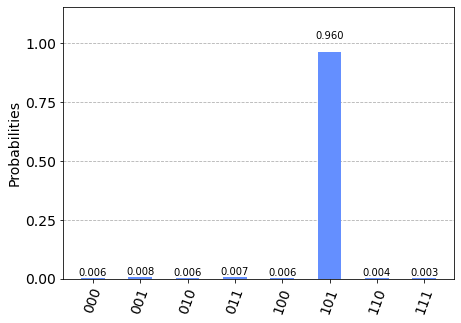

In [11]:
plot_histogram(counts)

In [12]:

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit,transpile,execute
from qiskit.tools.jupyter import *
import qiskit
 
# Qiskit quantum circuits libraries
# prepare your circuit to run
from qiskit import IBMQ

IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q-education', group='iisc-bangalore-1', project = 'm-tech-quantum-t')
device = provider.get_backend('ibmq_casablanca')


In [13]:
from qiskit.tools.monitor import job_monitor 
from qiskit import transpile, assemble
def transpile_circuit(circuit,backend):
 trans_circ = transpile(circuit, backend)
 display(trans_circ.draw(output="mpl"))
 

In [14]:
transpiled_grover_circuit = transpile(circuit, device, optimization_level=3)
print("Circuit data\n\nDepth: ",transpiled_grover_circuit.depth(),"\
nWidth: ",transpiled_grover_circuit.width(),"\nSize: ",transpiled_grover_circuit.
size())
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)


Circuit data

Depth:  2714 nWidth:  10 
Size:  3870
Job Status: job has successfully run


In [15]:
results = job.result()
answer = results.get_counts(circuit)

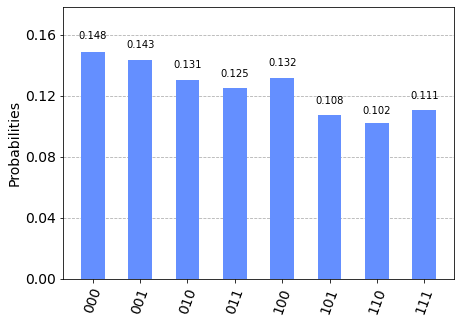

In [16]:
plot_histogram(answer)

In [17]:
transpiled_grover_circuit.draw()